# Fase 3 - Big Data

## Welcome to Big Data

### Aula 1 - Big Data

Olá,estudante!

Queremos te dar as boas-vindasàterceirafase do nosso curso PósTechemData  Analytics.  Estamos animados(as)para  lhe  acompanhar  nesta jornada de conhecimentos!

Nesta terceira fase, vemos que a estrutura de disciplina está da seguinte forma e ordem:

1. Framework de Big Data;
2. Banco de dados para Big Data.

Esta fase tem como objetivo explorar os fundamentos e práticas relacionados ao universo do Big Data, com ênfase no framework Spark, bancos de dados em nuvem e o uso de dados geoespaciais.

O  crescimento  exponencial  na  quantidade  de  informações  geradas  requer soluções  eficientes  para  coleta,  armazenamento  e  análise  desses  dados.  Um  dos principais  desafios  é  lidar  com  a  escala  e  a  variedade  dos  dados,  provenientes  de diferentes fontes e em diferentes formatos.

O  framework  Spark  será  estudado  como  uma  solução de  processamento distribuído  para  lidar  com  esses  desafios,  permitindo  o  processamento  eficiente  de dados em larga escala. Além disso, serão discutidos os benefícios e as considerações ao  utilizar  bancos  de  dados  em  nuvem  para  armazenar  e  acessar  dados  de forma rápida e escalável.

Ao  final  de  cada  disciplina  contaremos  com  desafios  para  te  preparar  para situações práticas.

Tudo isso se justifica em uma aprendizagem contínua, ativa e que mostra mais do que nunca que um passo por vez nos leva muito longe!

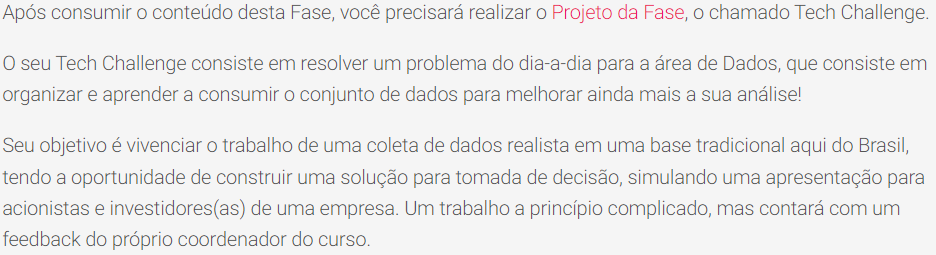

## Framework de Big Data

### Aula 1 - Conhecendo o Spark

#### Introdução

**Apache SPARK**

**Pyspark**

o PySpark é uma API Python para Apache SPARK que é denominado como o **mecanismo de processamento analítico para aplicações de processamento de dados distribuídos em larga escala e aprendizado de máquina**, ou seja, para grandes volumes de dados.

O uso da biblioteca Pyspark possui diversas vantagens:

• É um mecanismo de processamento distribuído, na memória, que permite o processamento de dados de forma eficiente e de características distribuída.

• Com o uso do PySpark, é possível o processamento de dados em Hadoop (HDFS), AWS S3 e outros sistemas de arquivos.

• Possui bibliotecas de aprendizado de máquina e gráficos.

• Geralmente as aplicações criadas e executadas no PySpark são 100x mais rápidas que outras em sistemas de dados conhecidos.

Toda a execução dos scripts é realizada dentro do Apache Spark, que distribui o processamento dentro de um ambiente de cluster que são interligados aos NÓS que realizam a execução e transformação dos dados.

#### Parte 1 - Instalação, importação e iniciação de bibliotecas e Principais operações usando Pyspark

##### Instalação da biblioteca pyspark e findspark

In [52]:
!pip install pyspark

In [53]:
!pip install findspark

In [54]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [55]:
df = spark.sql('''select 'Sucesso total, estamos online!' as hello''')

df.show()

+--------------------+
|               hello|
+--------------------+
|Sucesso total, es...|
+--------------------+



In [56]:
# Importando bibliotecas spark

from pyspark.sql import Row, DataFrame
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark.sql.functions import col, expr, lit, substring, concat, concat_ws, when, coalesce
from pyspark.sql import functions as F # para mais funções sql
from functools import reduce

##### Manipulação de dados no spark

In [57]:
df = spark.read.csv('banklist.csv', sep=',', inferSchema=True, header=True)

print('df.count: ', df.count()) # n de linhas
print('df.columns: ', df.columns) # nome das colunas
print('df.col ct: ', len(df.columns)) # n de colunas

df.count:  561
df.columns:  ['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution', 'Closing Date']
df.col ct:  6


##### Usando SQL em Pyspark

In [58]:
df.createOrReplaceTempView("banklist") # nome do objeto temporário

df_check = spark.sql('''select `Bank Name`, City, `Closing Date` from banklist''')
df_check.show(4, truncate=False)

+--------------------------------+-------------+------------+
|Bank Name                       |City         |Closing Date|
+--------------------------------+-------------+------------+
|The First State Bank            |Barboursville|3-Apr-20    |
|Ericson State Bank              |Ericson      |14-Feb-20   |
|City National Bank of New Jersey|Newark       |1-Nov-19    |
|Resolute Bank                   |Maumee       |25-Oct-19   |
+--------------------------------+-------------+------------+
only showing top 4 rows



##### Dataframe basic operations

In [59]:
df.describe().show()

+-------+--------------------+-------+----+-----------------+---------------------+------------+
|summary|           Bank Name|   City|  ST|             CERT|Acquiring Institution|Closing Date|
+-------+--------------------+-------+----+-----------------+---------------------+------------+
|  count|                 561|    561| 561|              561|                  561|         561|
|   mean|                NULL|   NULL|NULL|31685.68449197861|                 NULL|        NULL|
| stddev|                NULL|   NULL|NULL|16446.65659309965|                 NULL|        NULL|
|    min|1st American Stat...|Acworth|  AL|               91|      1st United Bank|    1-Aug-08|
|    max|               ebank|Wyoming|  WY|            58701|  Your Community Bank|    9-Sep-11|
+-------+--------------------+-------+----+-----------------+---------------------+------------+



In [60]:
df.describe('City', 'ST').show()

+-------+-------+----+
|summary|   City|  ST|
+-------+-------+----+
|  count|    561| 561|
|   mean|   NULL|NULL|
| stddev|   NULL|NULL|
|    min|Acworth|  AL|
|    max|Wyoming|  WY|
+-------+-------+----+



##### Counts, Columns and Schema

In [61]:
print('Total de linhas:', df.count())
print('Total de colunas:', len(df.columns))
print('Tipo de dados:', df.dtypes)
print('Schema:', df.schema) # visualização do conteúdo desse schema de dados

Total de linhas: 561
Total de colunas: 6
Tipo de dados: [('Bank Name', 'string'), ('City', 'string'), ('ST', 'string'), ('CERT', 'int'), ('Acquiring Institution', 'string'), ('Closing Date', 'string')]
Schema: StructType([StructField('Bank Name', StringType(), True), StructField('City', StringType(), True), StructField('ST', StringType(), True), StructField('CERT', IntegerType(), True), StructField('Acquiring Institution', StringType(), True), StructField('Closing Date', StringType(), True)])


In [62]:
print('df schema 1:')
df.printSchema()

df schema 1:
root
 |-- Bank Name: string (nullable = true)
 |-- City: string (nullable = true)
 |-- ST: string (nullable = true)
 |-- CERT: integer (nullable = true)
 |-- Acquiring Institution: string (nullable = true)
 |-- Closing Date: string (nullable = true)



##### Remove Duplicates

In [63]:
df = df.dropDuplicates()
print('df.count		:', df.count())
print('df.columns	:', df.columns)

df.count		: 561
df.columns	: ['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution', 'Closing Date']


##### Select specific columns

In [64]:
df2 = df.select(*['Bank Name', 'City'])
df2.show()

+--------------------+----------------+
|           Bank Name|            City|
+--------------------+----------------+
| First Bank of Idaho|         Ketchum|
|Amcore Bank, Nati...|        Rockford|
|        Venture Bank|           Lacey|
|First State Bank ...|           Altus|
|Valley Capital Ba...|            Mesa|
|Michigan Heritage...|Farmington Hills|
|Columbia Savings ...|      Cincinnati|
|       Fidelity Bank|        Dearborn|
|The Park Avenue Bank|        Valdosta|
|Western Commercia...|  Woodland Hills|
|        Syringa Bank|           Boise|
|Republic Federal ...|           Miami|
|Westside Communit...|University Place|
|   First United Bank|           Crete|
|HarVest Bank of M...|    Gaithersburg|
|            BankEast|       Knoxville|
|    Polk County Bank|        Johnston|
|Colorado Capital ...|     Castle Rock|
|         Access Bank|        Champlin|
|Pacific National ...|   San Francisco|
+--------------------+----------------+
only showing top 20 rows



##### Select multiple columns

In [65]:
col_l = list(set(df.columns)  - {'CERT','ST'})
df2 = df.select(*col_l)
df2.show()

+------------+--------------------+----------------+---------------------+
|Closing Date|           Bank Name|            City|Acquiring Institution|
+------------+--------------------+----------------+---------------------+
|   24-Apr-09| First Bank of Idaho|         Ketchum|      U.S. Bank, N.A.|
|   23-Apr-10|Amcore Bank, Nati...|        Rockford|          Harris N.A.|
|   11-Sep-09|        Venture Bank|           Lacey| First-Citizens Ba...|
|   31-Jul-09|First State Bank ...|           Altus|         Herring Bank|
|   11-Dec-09|Valley Capital Ba...|            Mesa| Enterprise Bank &...|
|   24-Apr-09|Michigan Heritage...|Farmington Hills|       Level One Bank|
|   23-May-14|Columbia Savings ...|      Cincinnati| United Fidelity B...|
|   30-Mar-12|       Fidelity Bank|        Dearborn| The Huntington Na...|
|   29-Apr-11|The Park Avenue Bank|        Valdosta|   Bank of the Ozarks|
|    5-Nov-10|Western Commercia...|  Woodland Hills| First California ...|
|   31-Jan-14|        Syr

##### Rename columns

In [66]:
df2 = df \
  .withColumnRenamed('Bank Name'            , 'bank_name') \
  .withColumnRenamed('Acquiring Institution', 'acq_institution') \
  .withColumnRenamed('Closing Date'         , 'closing_date') \
  .withColumnRenamed('ST'                   , 'state') \
  .withColumnRenamed('CERT'                 , 'cert')

df2.show()

+--------------------+----------------+-----+-----+--------------------+------------+
|           bank_name|            City|state| cert|     acq_institution|closing_date|
+--------------------+----------------+-----+-----+--------------------+------------+
| First Bank of Idaho|         Ketchum|   ID|34396|     U.S. Bank, N.A.|   24-Apr-09|
|Amcore Bank, Nati...|        Rockford|   IL| 3735|         Harris N.A.|   23-Apr-10|
|        Venture Bank|           Lacey|   WA|22868|First-Citizens Ba...|   11-Sep-09|
|First State Bank ...|           Altus|   OK| 9873|        Herring Bank|   31-Jul-09|
|Valley Capital Ba...|            Mesa|   AZ|58399|Enterprise Bank &...|   11-Dec-09|
|Michigan Heritage...|Farmington Hills|   MI|34369|      Level One Bank|   24-Apr-09|
|Columbia Savings ...|      Cincinnati|   OH|32284|United Fidelity B...|   23-May-14|
|       Fidelity Bank|        Dearborn|   MI|33883|The Huntington Na...|   30-Mar-12|
|The Park Avenue Bank|        Valdosta|   GA|19797|  B

#### Parte 2 - Continuando as principais operações em Pyspark

##### Add columns


In [67]:
df2 = df.withColumn('state', col('ST')) #  Insere uma nova coluna State, copiando a coluna ST
df2.show()

+--------------------+----------------+---+-----+---------------------+------------+-----+
|           Bank Name|            City| ST| CERT|Acquiring Institution|Closing Date|state|
+--------------------+----------------+---+-----+---------------------+------------+-----+
| First Bank of Idaho|         Ketchum| ID|34396|      U.S. Bank, N.A.|   24-Apr-09|   ID|
|Amcore Bank, Nati...|        Rockford| IL| 3735|          Harris N.A.|   23-Apr-10|   IL|
|        Venture Bank|           Lacey| WA|22868| First-Citizens Ba...|   11-Sep-09|   WA|
|First State Bank ...|           Altus| OK| 9873|         Herring Bank|   31-Jul-09|   OK|
|Valley Capital Ba...|            Mesa| AZ|58399| Enterprise Bank &...|   11-Dec-09|   AZ|
|Michigan Heritage...|Farmington Hills| MI|34369|       Level One Bank|   24-Apr-09|   MI|
|Columbia Savings ...|      Cincinnati| OH|32284| United Fidelity B...|   23-May-14|   OH|
|       Fidelity Bank|        Dearborn| MI|33883| The Huntington Na...|   30-Mar-12|   MI|

##### Add constant column

In [68]:
df2 = df.withColumn('country', lit('US')) # Adicionando um valor fixo - o mesmo para todos
df2.show(2)

+--------------------+--------+---+-----+---------------------+------------+-------+
|           Bank Name|    City| ST| CERT|Acquiring Institution|Closing Date|country|
+--------------------+--------+---+-----+---------------------+------------+-------+
| First Bank of Idaho| Ketchum| ID|34396|      U.S. Bank, N.A.|   24-Apr-09|     US|
|Amcore Bank, Nati...|Rockford| IL| 3735|          Harris N.A.|   23-Apr-10|     US|
+--------------------+--------+---+-----+---------------------+------------+-------+
only showing top 2 rows



##### Drop columns

In [69]:
df2 = df.drop('CERT')
df2.show(2)

+--------------------+--------+---+---------------------+------------+
|           Bank Name|    City| ST|Acquiring Institution|Closing Date|
+--------------------+--------+---+---------------------+------------+
| First Bank of Idaho| Ketchum| ID|      U.S. Bank, N.A.|   24-Apr-09|
|Amcore Bank, Nati...|Rockford| IL|          Harris N.A.|   23-Apr-10|
+--------------------+--------+---+---------------------+------------+
only showing top 2 rows



##### Drop multiple columns

In [70]:
df2 = df.drop(*['CERT','ST'])
df2.show(2)

+--------------------+--------+---------------------+------------+
|           Bank Name|    City|Acquiring Institution|Closing Date|
+--------------------+--------+---------------------+------------+
| First Bank of Idaho| Ketchum|      U.S. Bank, N.A.|   24-Apr-09|
|Amcore Bank, Nati...|Rockford|          Harris N.A.|   23-Apr-10|
+--------------------+--------+---------------------+------------+
only showing top 2 rows



In [71]:
df2 = reduce(DataFrame.drop, ['CERT','ST'], df) # mesmo resultado da operação acima
df2.show(2)

+--------------------+--------+---------------------+------------+
|           Bank Name|    City|Acquiring Institution|Closing Date|
+--------------------+--------+---------------------+------------+
| First Bank of Idaho| Ketchum|      U.S. Bank, N.A.|   24-Apr-09|
|Amcore Bank, Nati...|Rockford|          Harris N.A.|   23-Apr-10|
+--------------------+--------+---------------------+------------+
only showing top 2 rows



##### Filter data

In [72]:
# Equal to values
df2 = df.where(df['ST'] == 'NE')

# Between values
df3 = df.where(df['CERT'].between('1000','2000'))

# Is inside multiple values
df4 = df.where(df['ST'].isin('NE','IL'))

print('df.count  :', df.count())
print('df2.count :', df2.count())
print('df3.count :', df3.count())
print('df4.count :', df4.count())

df.count  : 561
df2.count : 4
df3.count : 9
df4.count : 73


##### Filter data using logical operators

In [73]:
df2 = df.where((df['ST'] == 'NE') & (df['City'] == 'Ericson'))
df2.show(3)

+------------------+-------+---+-----+---------------------+------------+
|         Bank Name|   City| ST| CERT|Acquiring Institution|Closing Date|
+------------------+-------+---+-----+---------------------+------------+
|Ericson State Bank|Ericson| NE|18265| Farmers and Merch...|   14-Feb-20|
+------------------+-------+---+-----+---------------------+------------+



##### Replace values in dataframe

In [74]:
# Pre replace
df.show(2)

# Post replace
print('Replace 7 in the above dataframe with 17 at all instances')
df.na.replace(7,17).show(2)

+--------------------+--------+---+-----+---------------------+------------+
|           Bank Name|    City| ST| CERT|Acquiring Institution|Closing Date|
+--------------------+--------+---+-----+---------------------+------------+
| First Bank of Idaho| Ketchum| ID|34396|      U.S. Bank, N.A.|   24-Apr-09|
|Amcore Bank, Nati...|Rockford| IL| 3735|          Harris N.A.|   23-Apr-10|
+--------------------+--------+---+-----+---------------------+------------+
only showing top 2 rows

Replace 7 in the above dataframe with 17 at all instances
+--------------------+--------+---+-----+---------------------+------------+
|           Bank Name|    City| ST| CERT|Acquiring Institution|Closing Date|
+--------------------+--------+---+-----+---------------------+------------+
| First Bank of Idaho| Ketchum| ID|34396|      U.S. Bank, N.A.|   24-Apr-09|
|Amcore Bank, Nati...|Rockford| IL| 3735|          Harris N.A.|   23-Apr-10|
+--------------------+--------+---+-----+---------------------+-------

### Aula 2 - Operações Básicas no Spark

##### Importação de dados e uso de RDD e DataFrame

In [75]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [76]:
sc = SparkContext.getOrCreate()

In [77]:
# Criando a sessão do SparkContext e SparkSession

spark = SparkSession.builder.appName('PySpark DataFrame From RDD').getOrCreate()

In [78]:
# Create PySpark Dataframe from an Existing RDD

rdd = sc.parallelize([('C',85,76,87,91), ('B',85,76,87,91), ("A", 85,78,96,92), ("A", 92,76,89,96)], 4) # Instanciando o RDD - criamos uma tabela com valores dentro dela

In [79]:
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [80]:
sub = ['id_person','value_1','value_2','value_3','value_4']

In [81]:
marks_df = spark.createDataFrame(rdd, schema=sub) # criar um DataFrame com base no RDD existente

In [82]:
print(type(marks_df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [83]:
marks_df.printSchema()

root
 |-- id_person: string (nullable = true)
 |-- value_1: long (nullable = true)
 |-- value_2: long (nullable = true)
 |-- value_3: long (nullable = true)
 |-- value_4: long (nullable = true)



In [84]:
marks_df.show()

+---------+-------+-------+-------+-------+
|id_person|value_1|value_2|value_3|value_4|
+---------+-------+-------+-------+-------+
|        C|     85|     76|     87|     91|
|        B|     85|     76|     87|     91|
|        A|     85|     78|     96|     92|
|        A|     92|     76|     89|     96|
+---------+-------+-------+-------+-------+



##### Operações básicas no DataFrame criado a partir do RDD

In [85]:
# Creating and Manipulation in PySpark DataFrame

spark=SparkSession.builder.appName("pysparkdf").getOrCreate()

In [86]:
# Importing Data

df = spark.read.csv('cereal.csv', sep = ',', inferSchema = True, header = True)

In [87]:
# Reading the schema

df.printSchema()

root
 |-- name: string (nullable = true)
 |-- mfr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- calories: integer (nullable = true)
 |-- protein: integer (nullable = true)
 |-- fat: integer (nullable = true)
 |-- sodium: integer (nullable = true)
 |-- fiber: double (nullable = true)
 |-- carbo: double (nullable = true)
 |-- sugars: integer (nullable = true)
 |-- potass: integer (nullable = true)
 |-- vitamins: integer (nullable = true)
 |-- shelf: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cups: double (nullable = true)
 |-- rating: double (nullable = true)



In [88]:
# Select ()

df.select('name', 'mfr', 'rating').show()

+--------------------+---+---------+
|                name|mfr|   rating|
+--------------------+---+---------+
|           100% Bran|  N|68.402973|
|   100% Natural Bran|  Q|33.983679|
|            All-Bran|  K|59.425505|
|All-Bran with Ext...|  K|93.704912|
|      Almond Delight|  R|34.384843|
|Apple Cinnamon Ch...|  G|29.509541|
|         Apple Jacks|  K|33.174094|
|             Basic 4|  G|37.038562|
|           Bran Chex|  R|49.120253|
|         Bran Flakes|  P|53.313813|
|        Cap'n'Crunch|  Q|18.042851|
|            Cheerios|  G|50.764999|
|Cinnamon Toast Cr...|  G|19.823573|
|            Clusters|  G|40.400208|
|         Cocoa Puffs|  G|22.736446|
|           Corn Chex|  R|41.445019|
|         Corn Flakes|  K|45.863324|
|           Corn Pops|  K|35.782791|
|       Count Chocula|  G|22.396513|
|  Cracklin' Oat Bran|  K|40.448772|
+--------------------+---+---------+
only showing top 20 rows



In [89]:
# withColumn()

df.withColumn("Calories",df['calories'].cast("Integer")).printSchema() # trocando calories para Calories, mantendo o dtype

root
 |-- name: string (nullable = true)
 |-- mfr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- Calories: integer (nullable = true)
 |-- protein: integer (nullable = true)
 |-- fat: integer (nullable = true)
 |-- sodium: integer (nullable = true)
 |-- fiber: double (nullable = true)
 |-- carbo: double (nullable = true)
 |-- sugars: integer (nullable = true)
 |-- potass: integer (nullable = true)
 |-- vitamins: integer (nullable = true)
 |-- shelf: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cups: double (nullable = true)
 |-- rating: double (nullable = true)



In [90]:
# groupBy()

df.groupBy("calories").count().show()

+--------+-----+
|calories|count|
+--------+-----+
|     140|    3|
|     120|   10|
|     100|   17|
|     130|    2|
|      50|    3|
|      80|    1|
|     160|    1|
|      70|    2|
|      90|    7|
|     110|   29|
|     150|    2|
+--------+-----+



In [91]:
# orderBy

df.orderBy("calories").show(50)

+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|                name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|
+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|All-Bran with Ext...|  K|   C|      50|      4|  0|   140| 14.0|  8.0|     0|   330|      25|    3|   1.0| 0.5|93.704912|
|         Puffed Rice|  Q|   C|      50|      1|  0|     0|  0.0| 13.0|     0|    15|       0|    3|   0.5| 1.0|60.756112|
|        Puffed Wheat|  Q|   C|      50|      2|  0|     0|  1.0| 10.0|     0|    50|       0|    3|   0.5| 1.0|63.005645|
|           100% Bran|  N|   C|      70|      4|  1|   130| 10.0|  5.0|     6|   280|      25|    3|   1.0|0.33|68.402973|
|            All-Bran|  K|   C|      70|      4|  1|   260|  9.0|  7.0|     5|   320|      25|    3|   1.0|0.33|59.425505|
|      Shredded 

In [92]:
# Case When()

from pyspark.sql.functions import when

df.select("name", df.vitamins, when(df.vitamins >= "25", "rich in vitamins")).show(50)

+--------------------+--------+----------------------------------------------------+
|                name|vitamins|CASE WHEN (vitamins >= 25) THEN rich in vitamins END|
+--------------------+--------+----------------------------------------------------+
|           100% Bran|      25|                                    rich in vitamins|
|   100% Natural Bran|       0|                                                NULL|
|            All-Bran|      25|                                    rich in vitamins|
|All-Bran with Ext...|      25|                                    rich in vitamins|
|      Almond Delight|      25|                                    rich in vitamins|
|Apple Cinnamon Ch...|      25|                                    rich in vitamins|
|         Apple Jacks|      25|                                    rich in vitamins|
|             Basic 4|      25|                                    rich in vitamins|
|           Bran Chex|      25|                                  

In [93]:
# filter()

df.filter(df.calories >= "100").show(50)

+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|                name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|
+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|   100% Natural Bran|  Q|   C|     120|      3|  5|    15|  2.0|  8.0|     8|   135|       0|    3|   1.0| 1.0|33.983679|
|      Almond Delight|  R|   C|     110|      2|  2|   200|  1.0| 14.0|     8|    -1|      25|    3|   1.0|0.75|34.384843|
|Apple Cinnamon Ch...|  G|   C|     110|      2|  2|   180|  1.5| 10.5|    10|    70|      25|    1|   1.0|0.75|29.509541|
|         Apple Jacks|  K|   C|     110|      2|  0|   125|  1.0| 11.0|    14|    30|      25|    2|   1.0| 1.0|33.174094|
|             Basic 4|  G|   C|     130|      3|  2|   210|  2.0| 18.0|     8|   100|      25|    3|  1.33|0.75|37.038562|
|        Cap'n'C

In [94]:
# isNotNull()

from pyspark.sql.functions import *

df.filter(df.name.isNotNull()).show()

+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|                name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|
+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|           100% Bran|  N|   C|      70|      4|  1|   130| 10.0|  5.0|     6|   280|      25|    3|   1.0|0.33|68.402973|
|   100% Natural Bran|  Q|   C|     120|      3|  5|    15|  2.0|  8.0|     8|   135|       0|    3|   1.0| 1.0|33.983679|
|            All-Bran|  K|   C|      70|      4|  1|   260|  9.0|  7.0|     5|   320|      25|    3|   1.0|0.33|59.425505|
|All-Bran with Ext...|  K|   C|      50|      4|  0|   140| 14.0|  8.0|     0|   330|      25|    3|   1.0| 0.5|93.704912|
|      Almond Delight|  R|   C|     110|      2|  2|   200|  1.0| 14.0|     8|    -1|      25|    3|   1.0|0.75|34.384843|
|Apple Cinnamon 

In [95]:
# isNull()

df.filter(df.name.isNull()).show()

+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+
|name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|rating|
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+



### Aula 3 - Consultas e Seleções

#### Parte 1 - Diferenças de se usar Spark SQL e Pyspark - Importações, tabela temporária e SELECT

In [96]:
# Spark SQL - Consultas e Seleções

df = spark.sql('''select 'OK' as Status''')
df.show()

+------+
|Status|
+------+
|    OK|
+------+



In [97]:
# Importing Data

df = spark.read.csv('cereal.csv', sep = ',', inferSchema=True, header = True)
df.show()

+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|                name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|
+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|           100% Bran|  N|   C|      70|      4|  1|   130| 10.0|  5.0|     6|   280|      25|    3|   1.0|0.33|68.402973|
|   100% Natural Bran|  Q|   C|     120|      3|  5|    15|  2.0|  8.0|     8|   135|       0|    3|   1.0| 1.0|33.983679|
|            All-Bran|  K|   C|      70|      4|  1|   260|  9.0|  7.0|     5|   320|      25|    3|   1.0|0.33|59.425505|
|All-Bran with Ext...|  K|   C|      50|      4|  0|   140| 14.0|  8.0|     0|   330|      25|    3|   1.0| 0.5|93.704912|
|      Almond Delight|  R|   C|     110|      2|  2|   200|  1.0| 14.0|     8|    -1|      25|    3|   1.0|0.75|34.384843|
|Apple Cinnamon 

In [98]:
df.count() # dataframe original

77

In [99]:
# Manipulation Data with Spark SQL

df.createOrReplaceTempView("cereal") # criando uma tabela temporária dentro da nossa sessão

In [100]:
cereal = spark.sql('''SELECT COUNT(*) AS total FROM cereal WHERE mfr = 'G' ''')
cereal.show()

+-----+
|total|
+-----+
|   22|
+-----+



In [101]:
df.where(df['mfr']=='G').count() # outra forma de chegar no mesmo resultado de linhas onde o valor mfr é G

22

#### Parte 2 - Continuando com Spark SQL (SELECT DISTINCT, WHERE, GROUPBY, CASE WHEN)

In [102]:
# Select Disctinct on SparkSQL

df.printSchema()

root
 |-- name: string (nullable = true)
 |-- mfr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- calories: integer (nullable = true)
 |-- protein: integer (nullable = true)
 |-- fat: integer (nullable = true)
 |-- sodium: integer (nullable = true)
 |-- fiber: double (nullable = true)
 |-- carbo: double (nullable = true)
 |-- sugars: integer (nullable = true)
 |-- potass: integer (nullable = true)
 |-- vitamins: integer (nullable = true)
 |-- shelf: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cups: double (nullable = true)
 |-- rating: double (nullable = true)



In [103]:
df.createOrReplaceTempView("cereal")

In [104]:
cereal = spark.sql('''SELECT  DISTINCT type, mfr FROM cereal''') # valores únicos
cereal.show()

+----+---+
|type|mfr|
+----+---+
|   C|  P|
|   C|  Q|
|   C|  N|
|   H|  Q|
|   C|  R|
|   H|  N|
|   C|  G|
|   H|  A|
|   C|  K|
+----+---+



In [105]:
# WHERE no Spark SQL

cereal = spark.sql('''SELECT * FROM cereal WHERE mfr = 'K' ''''')
cereal.count()

23

In [106]:
cereal = spark.sql('''SELECT * FROM cereal WHERE calories =100 ''''')
cereal.count()

17

In [107]:
cereal = spark.sql('''SELECT * FROM cereal WHERE mfr = 'K' AND calories =100 ''''')
cereal.count()

3

In [108]:
# GROUP BY

cereal = spark.sql('''SELECT mfr, \
                             type, \
                             count(*) AS total,
                             sum(calories) AS total_calories
                      FROM cereal
                      GROUP BY  \
                            mfr, \
                            type ''''')

# \ não é lido pelo computador

cereal.show()

+---+----+-----+--------------+
|mfr|type|total|total_calories|
+---+----+-----+--------------+
|  A|   H|    1|           100|
|  P|   C|    9|           980|
|  K|   C|   23|          2500|
|  G|   C|   22|          2450|
|  Q|   C|    7|           660|
|  R|   C|    8|           920|
|  Q|   H|    1|           100|
|  N|   H|    1|           100|
|  N|   C|    5|           420|
+---+----+-----+--------------+



In [109]:
# CASE WHEN

cereal = spark.sql(''' SELECT DISTINCT type
                        FROM cereal''')
cereal.show()

+----+
|type|
+----+
|   C|
|   H|
+----+



In [110]:
cereal = spark.sql(''' SELECT mfr,
                              type,
                             (case
                                    when type = 'C' then 'A'
                                    --when type = 'H' then 'B'
                                    else 'B'
                             end) as type_new,
                             count(*) AS total,
                             sum(calories) AS total_calories
                      FROM cereal
                      GROUP BY
                            mfr,
                            type ''''')

# comentário no SQL não é feito usando # e sim usando --

cereal.show()

+---+----+--------+-----+--------------+
|mfr|type|type_new|total|total_calories|
+---+----+--------+-----+--------------+
|  A|   H|       B|    1|           100|
|  P|   C|       A|    9|           980|
|  K|   C|       A|   23|          2500|
|  G|   C|       A|   22|          2450|
|  Q|   C|       A|    7|           660|
|  R|   C|       A|    8|           920|
|  Q|   H|       B|    1|           100|
|  N|   H|       B|    1|           100|
|  N|   C|       A|    5|           420|
+---+----+--------+-----+--------------+



#### Parte 3 - Consultas avançadas em SQL usando PySpark

In [111]:
# Consultas Avançadas em SQL usando PySpark

df.show(5)

+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|                name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|
+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|           100% Bran|  N|   C|      70|      4|  1|   130| 10.0|  5.0|     6|   280|      25|    3|   1.0|0.33|68.402973|
|   100% Natural Bran|  Q|   C|     120|      3|  5|    15|  2.0|  8.0|     8|   135|       0|    3|   1.0| 1.0|33.983679|
|            All-Bran|  K|   C|      70|      4|  1|   260|  9.0|  7.0|     5|   320|      25|    3|   1.0|0.33|59.425505|
|All-Bran with Ext...|  K|   C|      50|      4|  0|   140| 14.0|  8.0|     0|   330|      25|    3|   1.0| 0.5|93.704912|
|      Almond Delight|  R|   C|     110|      2|  2|   200|  1.0| 14.0|     8|    -1|      25|    3|   1.0|0.75|34.384843|
+---------------

In [112]:
cereal = spark.sql('''
                  SELECT mfr,
                         type,
                         sum(calories) as sum_calories,
                         min(calories) as min_calories,
                         max(calories) as max_calories,
                         cast (avg(calories) as decimal(10,2)) as avg_calories,

                         sum(carbo) as sum_carbo,
                         min(carbo) as min_carbo,
                         max(carbo) as max_carbo,
                         cast (avg(carbo) as decimal(10,2)) as avg_carbo,

                         sum(vitamins) as sum_vitamins,
                         min(vitamins) as min_vitamins,
                         max(vitamins) as max_vitamins,
                         cast (avg(vitamins) as decimal(10,2)) as avg_vitamins,

                         count(distinct name) as count_distinct_names,
                         count(name) as count_names
                  FROM cereal
                  GROUP BY mfr, type
                  ORDER BY mfr, type ''')
cereal.show()

+---+----+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+--------------------+-----------+
|mfr|type|sum_calories|min_calories|max_calories|avg_calories|sum_carbo|min_carbo|max_carbo|avg_carbo|sum_vitamins|min_vitamins|max_vitamins|avg_vitamins|count_distinct_names|count_names|
+---+----+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+--------------------+-----------+
|  A|   H|         100|         100|         100|      100.00|     16.0|     16.0|     16.0|    16.00|          25|          25|          25|       25.00|                   1|          1|
|  G|   C|        2450|         100|         140|      111.36|    324.0|     10.5|     21.0|    14.73|         775|          25|         100|       35.23|                  22|         22|
|  K|   C|        2500|          50|         160|      108.7

In [113]:
cereal = spark.sql('''
                  SELECT mfr,
                         type,
                         (case
                              when mfr = 'A' then 'Abacaxi'
                              when mfr = 'G' then 'Goiaba'
                              when mfr = 'K' then 'Banana'
                              when mfr = 'N' then 'Maça'
                              when mfr = 'P' then 'Tomate'
                              when mfr = 'Q' then 'Pera'
                              --when mfr = 'R'then 'Uva'
                              else 'NA'
                         end) as type_fruit,

                         sum(calories) as sum_calories,
                         min(calories) as min_calories,
                         max(calories) as max_calories,
                         cast (avg(calories) as decimal(10,2)) as avg_calories,

                         sum(carbo) as sum_carbo,
                         min(carbo) as min_carbo,
                         max(carbo) as max_carbo,
                         cast (avg(carbo) as decimal(10,2)) as avg_carbo,

                         sum(vitamins) as sum_vitamins,
                         min(vitamins) as min_vitamins,
                         max(vitamins) as max_vitamins,
                         cast (avg(vitamins) as decimal(10,2)) as avg_vitamins,

                         count(distinct name) as count_distinct_names,
                         count(name) as count_names
                  FROM cereal
                  GROUP BY mfr, type
                  ORDER BY mfr, type ''')
cereal.show()

+---+----+----------+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+--------------------+-----------+
|mfr|type|type_fruit|sum_calories|min_calories|max_calories|avg_calories|sum_carbo|min_carbo|max_carbo|avg_carbo|sum_vitamins|min_vitamins|max_vitamins|avg_vitamins|count_distinct_names|count_names|
+---+----+----------+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+--------------------+-----------+
|  A|   H|   Abacaxi|         100|         100|         100|      100.00|     16.0|     16.0|     16.0|    16.00|          25|          25|          25|       25.00|                   1|          1|
|  G|   C|    Goiaba|        2450|         100|         140|      111.36|    324.0|     10.5|     21.0|    14.73|         775|          25|         100|       35.23|                  22|         22|
|  K|

In [114]:
# JOINS

# INNER JOIN

sales = spark.read.csv('sales_data_sample.csv', sep = ',', inferSchema=True, header = True)

In [115]:
sales.show(5)

+-----------+---------------+---------+---------------+-------+---------------+-------+------+--------+-------+-----------+----+-----------+--------------------+----------------+--------------------+------------+-------------+-----+----------+-------+---------+---------------+----------------+--------+
|ORDERNUMBER|QUANTITYORDERED|PRICEEACH|ORDERLINENUMBER|  SALES|      ORDERDATE| STATUS|QTR_ID|MONTH_ID|YEAR_ID|PRODUCTLINE|MSRP|PRODUCTCODE|        CUSTOMERNAME|           PHONE|        ADDRESSLINE1|ADDRESSLINE2|         CITY|STATE|POSTALCODE|COUNTRY|TERRITORY|CONTACTLASTNAME|CONTACTFIRSTNAME|DEALSIZE|
+-----------+---------------+---------+---------------+-------+---------------+-------+------+--------+-------+-----------+----+-----------+--------------------+----------------+--------------------+------------+-------------+-----+----------+-------+---------+---------------+----------------+--------+
|      10107|             30|     95.7|              2| 2871.0| 2/24/2003 0:00|Shipped| 

In [116]:
sales.createOrReplaceTempView('sales')

In [117]:
calendar = spark.sql('''
                  SELECT DISTINCT orderdate, qtr_id, month_id, year_id
                  FROM sales
                  ORDER BY orderdate
                ''')

sales_data = spark.sql('''
                  SELECT DISTINCT ORDERNUMBER,
                                  CUSTOMERNAME,
                                  ORDERDATE,
                                  SALES,
                                  QUANTITYORDERED,
                                  PRODUCTCODE,
                                  ORDERLINENUMBER,
                                  PRICEEACH
                  FROM sales
                  ORDER BY ORDERNUMBER
                ''')

customers = spark.sql('''
                  SELECT DISTINCT CUSTOMERNAME,
                                  PHONE,
                                  ADDRESSLINE1,
                                  ADDRESSLINE2,
                                  CITY,
                                  STATE,
                                  POSTALCODE,
                                  COUNTRY,
                                  TERRITORY
                  FROM sales
                  ORDER BY CUSTOMERNAME
                ''')
sales_data.createOrReplaceTempView('sales_data')
calendar.createOrReplaceTempView('calendar')
customers.createOrReplaceTempView('customers')

In [118]:
calendar.count()

252

In [119]:
sales_data.count()

2823

In [120]:
customers.count()

92

In [121]:
master = spark.sql('''

                  SELECT DISTINCT s.ordernumber, c.city
                  FROM sales_data s
                  INNER JOIN customers c ON s.CUSTOMERNAME=c.CUSTOMERNAME

                  ''')
master.show()

+-----------+-------------+
|ordernumber|         city|
+-----------+-------------+
|      10300|    Frankfurt|
|      10385|   San Rafael|
|      10241|   Strasbourg|
|      10182|   San Rafael|
|      10140|   Burlingame|
|      10153|       Madrid|
|      10293|       Torino|
|      10161|      Aaarhus|
|      10406|    Kobenhavn|
|      10414|       Boston|
|      10311|       Madrid|
|      10357|   San Rafael|
|      10195| White Plains|
|      10189|     Pasadena|
|      10422|    Allentown|
|      10111|San Francisco|
|      10204|          NYC|
|      10151|         Oulu|
|      10304|   Versailles|
|      10369|   Brickhaven|
+-----------+-------------+
only showing top 20 rows



#### Parte 4 - Continuando as consultas avançadas

### Aula 4 - Operações entre Dataframes e Armazenamento

### Aula 5 - Introdução aos Sistemas de Recomendação

### Aula 6 - Recomendações com o Algoritmo ALS

## Bancos de dados para Big Data

### Aula 1 - Realização de consultas com Bigquery;

### Aula 2 - Disponibilização de bases de dados na nuvem;

### Aula 3 - Interação com ferramentas externas;

### Aula 4 - Consultas e interação através de Python;

### Aula 5 - Manipulação de dados geoespaciais;

### Aula 6 - Clustering com BigQuery ML